<a href="https://colab.research.google.com/github/volgapavel/MPTHI_HW/blob/main/Popov_hh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [54]:
hh_data = pd.read_csv('./drive/MyDrive/mphti/hh_database.csv', sep=';')
#Данные о курсе валют
exchange_rates_data = pd.read_csv('./drive/MyDrive/mphti/ExchangeRates.csv', sep=',')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [55]:
display(hh_data.head())
display(hh_data.tail())

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

Пол, возраст           ЗП  \
44739    Мужчина ,  30 лет , родился 17 января 1989   50000 руб.   
44740      Мужчина ,  27 лет , родился 5 марта 1992   39000 руб.   
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

                               Ищет работу на должность:  \
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                            Город, переезд, командировки  \
44739  Тверь , готов к переезду (Москва, Химки) , гот...   
44740  Липецк , готов к переезду , готов к командировкам   
44741  Челябинск , готова к переезду , готова к редки...   
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                               Занятость  \
44739                                   полная занятость   
44740  проектная работа, частичная занятость, полная ...   
44741                                   полная занятость   
44742              частичная занятость, полная занятость   
44743                                   полная занятость   

                                                  График  \
44739                      полный день, удаленная работа   
44740  удаленная работа, гибкий график, полный день, ...   
44741                      полный день, удаленная работа   
44742                                   удаленная работа   
44743                                        полный день   

                                             Опыт работы  \
44739  Опыт работы 7 лет 7 месяцев  Финансист, аналит...   
44740  Опыт работы 7 лет  Системный администратор, IT...   
44741  Опыт работы 21 год 5 месяцев  Январь 1998 — по...   
44742  Опыт работы 3 года 10 месяцев  Контент-менедже...   
44743  Опыт работы 15 лет 10 месяцев  Руководитель пр...   

                         Последнее/нынешнее место работы  \
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность  \
44739                     Руководитель субгруппы   
44740                            Предприниматель   
44741                 Начальник группы аналитики   
44742                          Менеджер проектов   
44743  Руководитель отдела технической поддержки   

                                       Образование и ВУЗ Обновление резюме  \
44739  Высшее образование 2015  Московский гуманитарн...  22.04.2019 12:32   
44740  Высшее образование (Бакалавр) 2016  Воронежски...  22.04.2019 13:11   
44741  Высшее образование 2000  Южно-Уральский госуда...  09.04.2019 05:07   
44742  Высшее образование 2015  Тамбовский государств...  26.04.2019 14:25   
44743  Высшее образование 1997  Южно-Российский госуд...  05.07.2018 20:15   

                                 Авто  
44739                      Не указано  
44740                      Не указано  
44741                      Не указано  
44742  Имеется собственный автомобиль  
44743                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [56]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [57]:
hh_data.count()

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [58]:
hh_data.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [59]:
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: x[:x.find('об')-1].lower())
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

In [60]:
hh_data['Образование'].unique()

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [61]:
def split_gender_age(value):
    gender, age, _ = value.split(' , ')
    gender = gender[0]
    age = age.lstrip()
    age = int(age[:age.find(' ')])
    return pd.Series([gender, age])


hh_data[['Пол', 'Возраст']] = hh_data['Пол, возраст'].apply(split_gender_age)
hh_data = hh_data.drop('Пол, возраст', axis=1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [62]:
def get_experience_month(value):
    if pd.isnull(value) or value=='Не указано':
        return np.nan

    value = value.split()[2:6]
    year = 0
    month = 0

    for i, string in enumerate(value):
        if string[:3]=='год' or string[:3]=='лет':
            year = int(value[i-1])
        elif string[:5]=='месяц':
            month = int(value[i-1])

    return year*12 + month


hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience_month)
hh_data = hh_data.drop('Опыт работы', axis=1)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , …
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [63]:
def city_moving_trips_split(value):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    value = value.split(' , ')
    if 'м.' in value[1]:
        value.pop(1)
    city = value[0]
    moving = value[1]

    if city=='Москва' or city=='Санкт-Петербург':
        pass
    elif city in million_cities:
        city = 'город-миллионник'
    else:
        city='другие'

    if moving[0] == 'н':
        moving = False
    else:
        moving = True

    if len(value)==3 and value[2][0] != 'н':
        trip = True
    else:
        trip = False

    return pd.Series([city, moving, trip])


hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = hh_data['Город, переезд, командировки'].apply(city_moving_trips_split)
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [64]:
def split_employment(value):
    employment_dict = {'полная занятость' : False, 'частичная занятость' : False, 'проектная работа' : False, 'волонтерство' : False, 'стажировка' : False}
    value = value.split(', ')
    for val in value:
        employment_dict[val] = True
    return pd.Series(employment_dict.values())

def split_schedule(value):
    schedule_dict = {'полный день' : False, 'сменный график' : False, 'гибкий график' : False, 'удаленная работа' : False, 'вахтовый метод' : False}
    value = value.split(', ')
    for val in value:
        schedule_dict[val] = True
    return pd.Series(schedule_dict.values())

hh_data[['полная занятость', 'частичная занятость', 'проектная работа', 'волонтёрство', 'стажировка']] = hh_data['Занятость'].apply(split_employment)
hh_data = hh_data.drop('Занятость', axis=1)

hh_data[['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']] = hh_data['График'].apply(split_schedule)
hh_data = hh_data.drop('График', axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата,
* "proportion" - пропорция,
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования:
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [65]:
#Приведение даты к общему формату
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
exchange_rates_data['Date_update'] = pd.to_datetime(exchange_rates_data['date'], dayfirst=True).dt.date

#Разделение числа желаемой ЗП от валюты
hh_data['ЗП'] = hh_data['ЗП'].astype(str)
hh_data['ЗП_Валюта_ISO'] = hh_data['ЗП'].apply(lambda x: x.split()[1])
hh_data['ЗП'] = hh_data['ЗП'].apply(lambda x: x.split()[0])
hh_data['ЗП'] = hh_data['ЗП'].astype(float)

currency_iso = exchange_rates_data['currency'].unique()

#Функция преобразования валюты в ISO формат
def iso_transformation(currency):
    if (currency in currency_iso):
        return currency
    elif currency == 'руб.':
        return 'RUB'
    elif currency == 'бел.руб.':
        return 'BYN'
    elif currency == 'грн.':
        return 'UAH'
    elif currency == 'сум':
        return 'UZS'

hh_data['ЗП_Валюта_ISO'] = hh_data['ЗП_Валюта_ISO'].apply(iso_transformation)

#Соединение таблиц по указанным ключам
temp_data = hh_data.merge(
    exchange_rates_data,
    left_on=['Обновление резюме', 'ЗП_Валюта_ISO'],
    right_on=['Date_update', 'currency'],
    how='left'
    )

#Заполняем столбцы для валюты RUB
temp_data['close'] = temp_data['close'].fillna(1)
temp_data['proportion'] = temp_data['proportion'].fillna(1)

hh_data['ЗП (руб)'] = temp_data['ЗП']*temp_data['close']/temp_data['proportion']

#Ответ на контрольные вопросы
answer = hh_data['ЗП (руб)'].median()/1000
print(f'Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? Ответ: {round(answer, 0)}')

hh_data = hh_data.drop(['ЗП', 'ЗП_Валюта_ISO'], axis=1)

<ipython-input-65-11112f86e5c5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates_data['Date_update'] = pd.to_datetime(exchange_rates_data['date'], dayfirst=True).dt.date


Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? Ответ: 59.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [84]:
hh_data_temp = hh_data.copy()

fig = px.histogram(
    hh_data,
    x='Возраст',
    marginal='box',
    color_discrete_sequence=['blue']
)
fig.update_layout(title_text='<b>Распределения возраста соискателей</b>', title_x=0.5)
fig.show()

#Ответ на контрольные вопросы
answer = hh_data['Возраст'].mode()
print(f'Чему равно модальное значение возраста соискателей? Ответ: {answer}')

answer = hh_data['Опыт работы (месяц)'].max()
print(f'Чему равен максимальный опыт работы (в месяцах)? Ответ: {answer}')

Чему равно модальное значение возраста соискателей? Ответ: 0    30
Name: Возраст, dtype: int64
Чему равен максимальный опыт работы (в месяцах)? Ответ: 1188.0


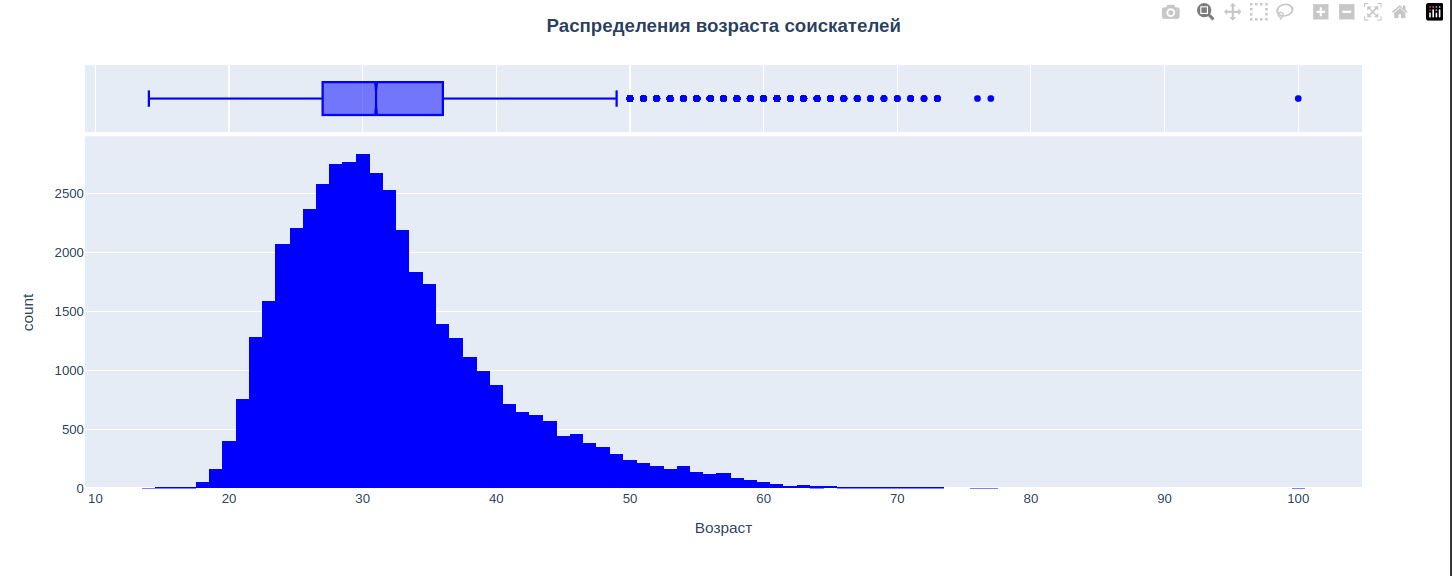

Вывод: Наиболее часто встречающийся возраст соискателей(Мода) - 30 лет. Максимальный возраст соискателя - 100 лет (как будто похож на аномалию- надо будет дополнительно исследовать), а минимальный - 14 лет. Возраст большинства соискателей находится в промежутке от 27 до 36 лет. Минимальный возраст с которого работодатель может принять работника равен 16 годам, в исключительных случаях с 15 лет. Поэтому аномалиями можно считать резюме с указанным возрастом до 16 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [85]:
fig = px.histogram(
    hh_data,
    x='Опыт работы (месяц)',
    marginal='box',
    color_discrete_sequence=['blue'],
)
fig.update_layout(title_text='<b>Распределение опыта соискателей</b>', title_x=0.5)
fig.show()

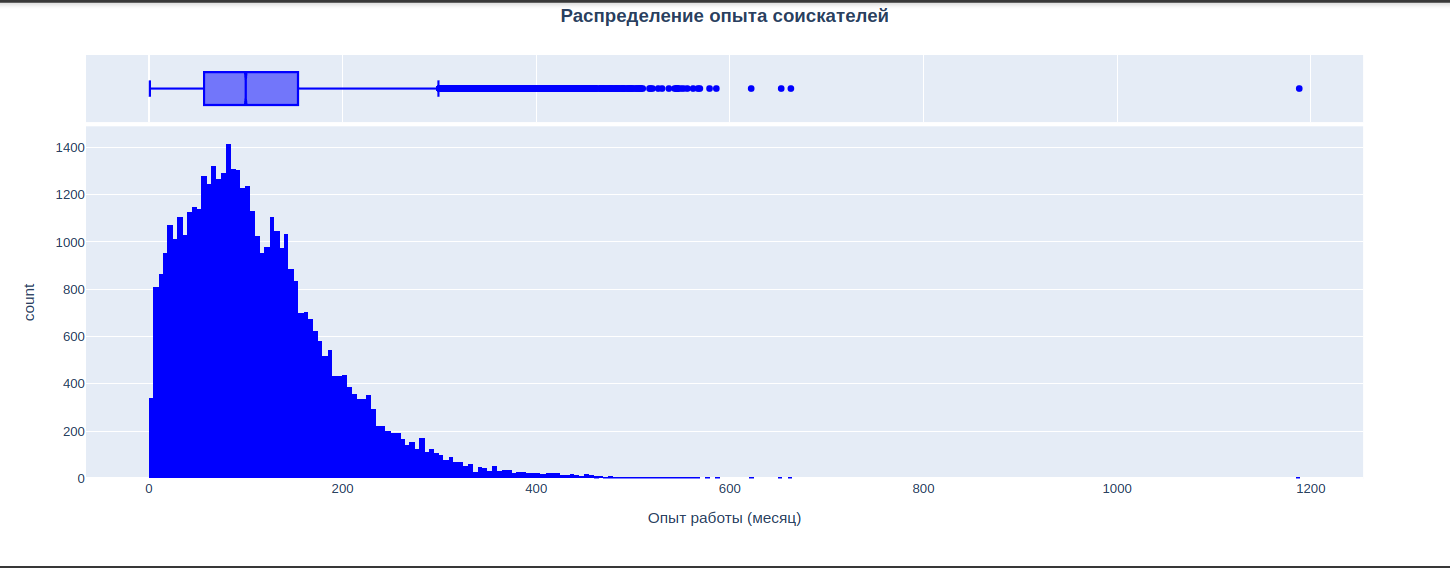

Вывод: Опыт работы соискателей находиться в промежутке 57-154 месяца (5-13 лет). Наиболее часто встречаются соискатели с опытом 80-84 месяца (7 лет), что довольно логично перекликается с модой по возрасту соискателей (30-7 = 23 года) - возраст окончания института. Самый большой опыт работы - 1188 месяцев (99 лет) очевидно является выбросом.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [89]:
fig = px.histogram(
    hh_data,
    x='ЗП (руб)',
    marginal='box',
    color_discrete_sequence=['blue'],
    width=10000,
)
fig.update_layout(title_text='<b>Распределение желаемой заработной платы соискателей</b>', title_x=0.5)
fig.show()

#Ответ на контрольные вопросы
answer = hh_data[hh_data['ЗП (руб)']>1000000].shape[0]
print(f'Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей? Ответ: {answer}')

Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей? Ответ: 5


In [91]:
# так как график не наглядный фильтруем данные выбросы можем увидеть на графике выше
filtered_data = hh_data[(hh_data['ЗП (руб)'] > 0) & (hh_data['ЗП (руб)'] <= 5000000)]

# Создаем график
fig = px.histogram(
    filtered_data,
    x='ЗП (руб)',
    marginal='box',
    color_discrete_sequence=['blue'],
)
fig.update_layout(title_text='<b>Распределение желаемой заработной платы соискателей</b>', title_x=0.5)
fig.show()



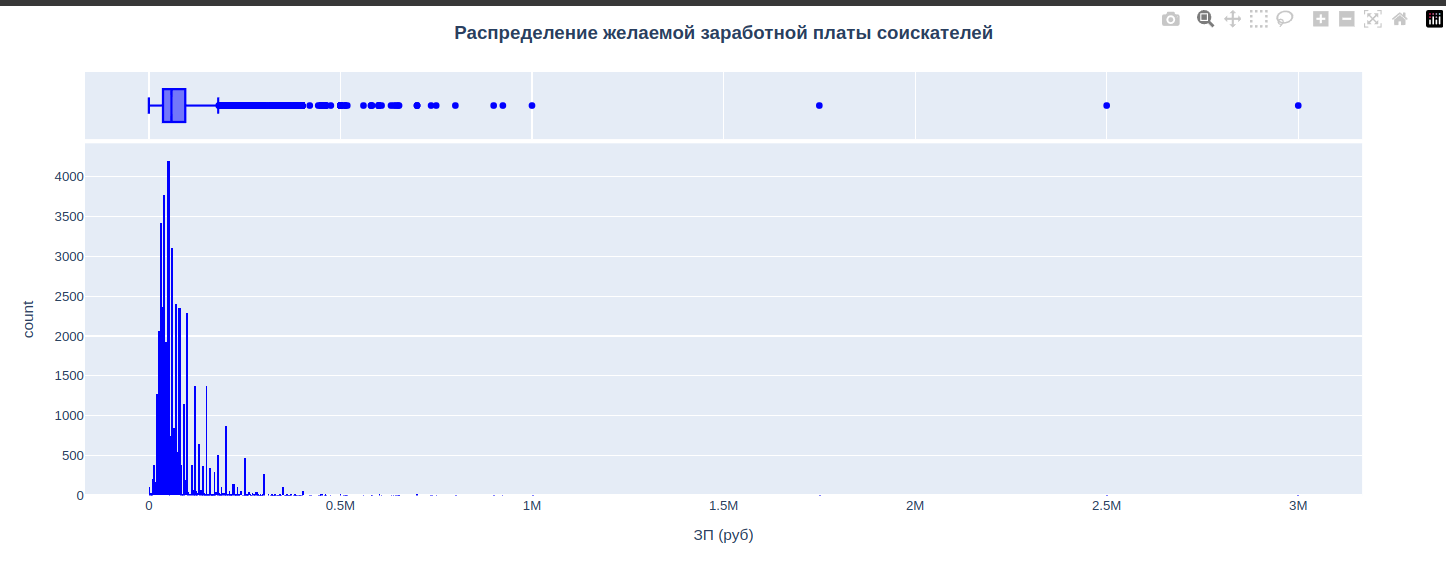

Вывод: Заработная плата большинства соискателей сосредоточена в промежутке от 37 до 95 т.р. На графике видны выбросы в виде гигантских размеров заработной платы из-за чего график выглядит довольно растянутым. Мы уже знаем что наибольшее число соискателей имеют возраст 30 лет, с опытом работы около 7 лет желают получать з.п. от 37-95 т.р. В начале карьеры соискатели готовы работать за з.п. от 2.5 т.р.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [92]:
salary_education=hh_data[hh_data['ЗП (руб)']<1000000]
salary_education=salary_education.groupby('Образование', as_index=False)['ЗП (руб)'].median().sort_values('ЗП (руб)', ascending=False)
#display(salary_education)

fig = px.histogram(
    data_frame=salary_education,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    title='Распределения желаемой заработной платы в зависимости от образования',
    color_discrete_sequence=["red", "grey", "gold", "black"],
)
fig.update_layout(title_text='<b>Зависимость медианной желаемой заработной платы от уровня образования соискателей</b>', title_x=0.5)
fig.show()

#Ответ на контрольные вопросы
salary_education=hh_data[hh_data['ЗП (руб)']<1000000]
answer = salary_education.groupby('Образование', as_index=False)['ЗП (руб)'].median().sort_values('ЗП (руб)', ascending=False)['Образование'].iloc[0]
print(f'Какая категория образования оплачивается выше всех по медианному показателю? Ответ: {answer}')

Какая категория образования оплачивается выше всех по медианному показателю? Ответ: высшее


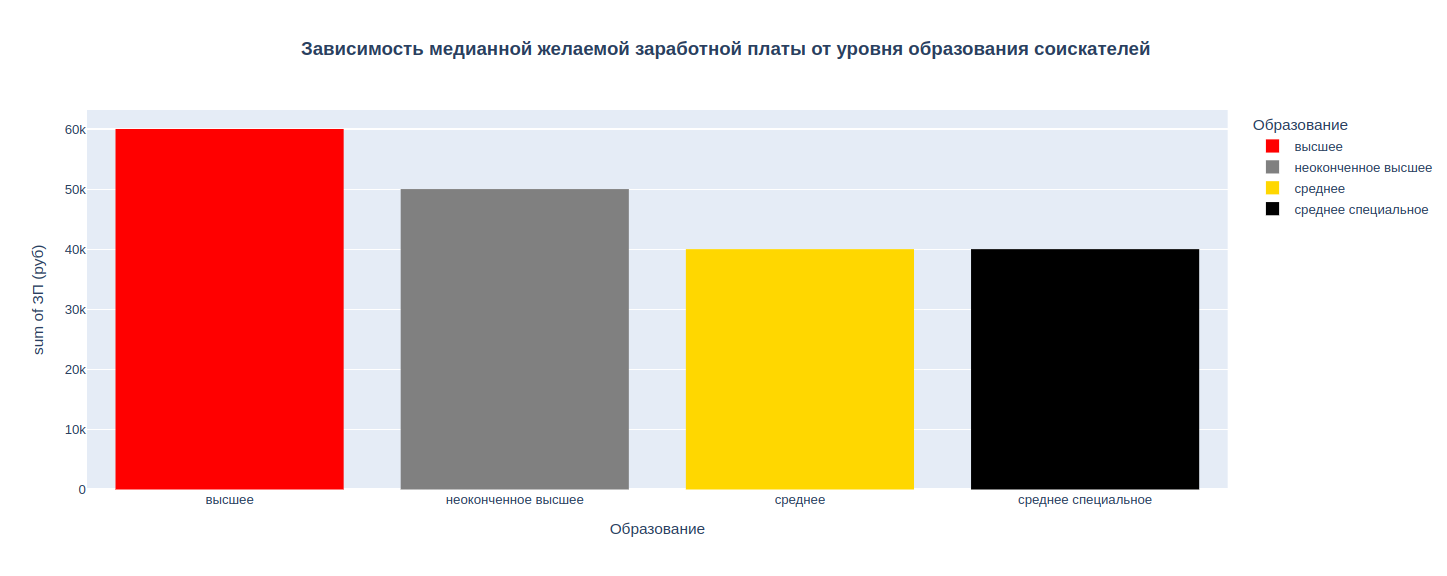

Вывод: Есть прямая положительная корреляция ЗП с уровнем образования

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [93]:
salary_sity=hh_data[hh_data['ЗП (руб)']<1000000]

fig = px.box(
    data_frame=salary_sity,
    x='Город',
    y='ЗП (руб)',
    labels={'Age':'Возраст', 'Exited':'Статус'},
    color='Город',
    color_discrete_sequence=["black", "red", "gold", "grey"],
    height=1000
)
fig.update_layout(title_text='<b>Распределение желаемой заработной платы в зависимости от города поиска</b>', title_x=0.5)
fig.show()

#Ответ на контрольные вопросы
salary_sity=hh_data[hh_data['ЗП (руб)']<1000000]
answer = salary_sity.groupby('Город', as_index=False)['ЗП (руб)'].max().sort_values('ЗП (руб)', ascending=False)['Город'].iloc[0]
print(f'В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)? Ответ: {answer}')

В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)? Ответ: другие


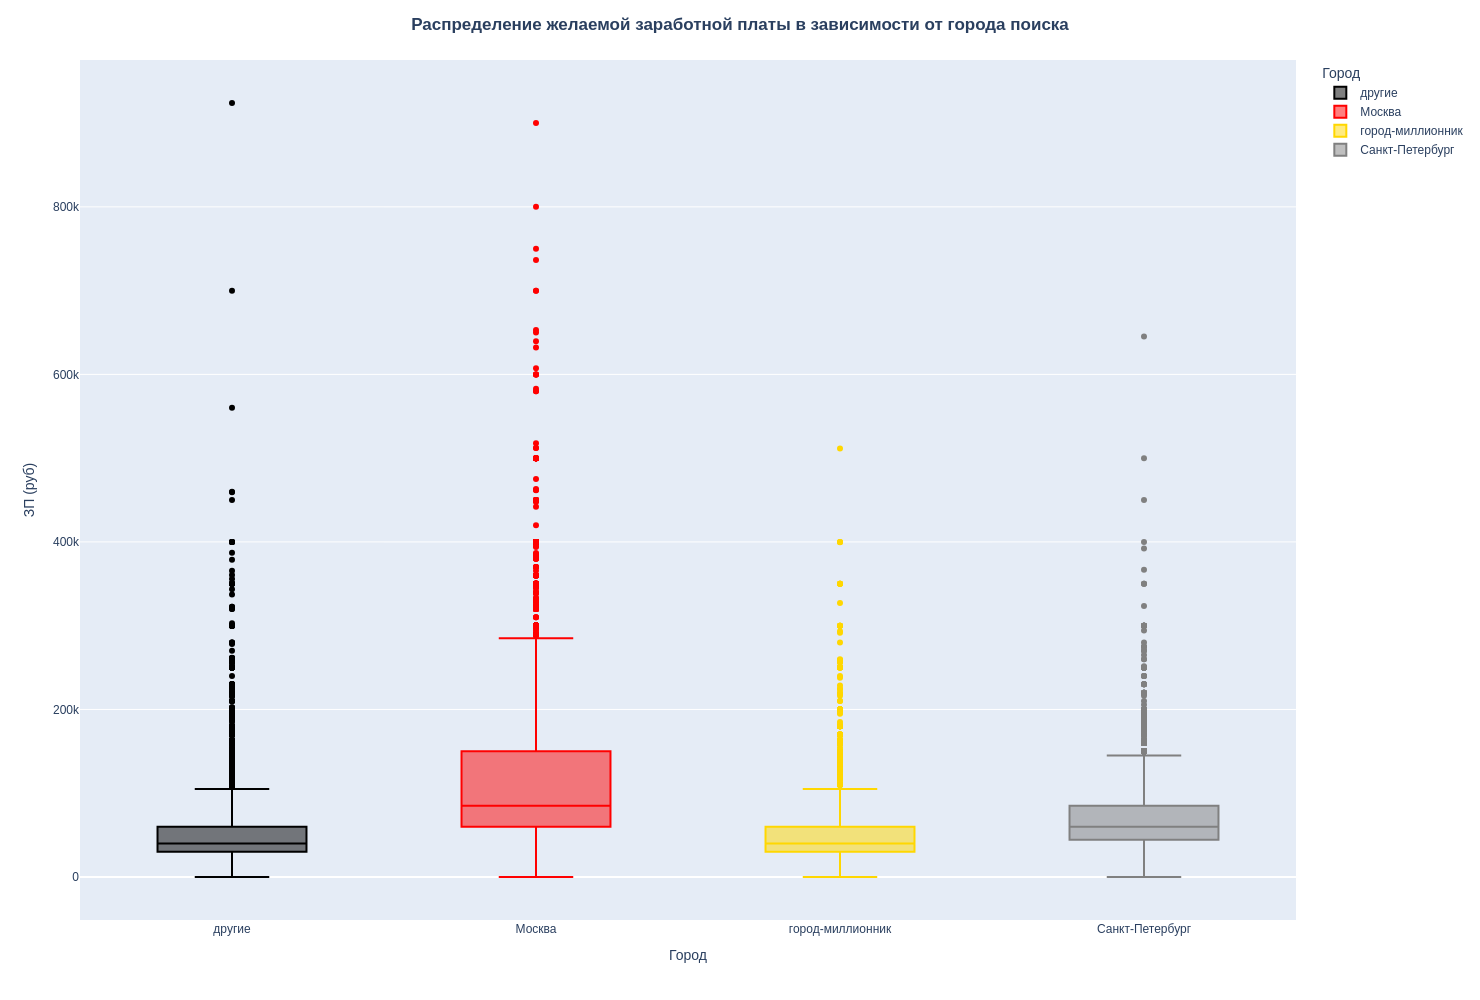

Вывод: наивысший медианный уровень заработной платы принадлежит городу Москва (85 т.р.), на втором месте располагается город Санкт-Петербург(60 т.р.), в двух других категориях распределения медианные уровни желаемой заработной платы равны(40 т.р.). В категории "другие" находится самый большой выброс по желаемой заработной плате (~942 т.р.). Наибольший разброс желаемой заработной платы принадлежит городу Москва.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [95]:
salary_transfer = hh_data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=salary_transfer,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    labels={'Готовность к переезду':'Готовность к переезду/переезду', 'ЗП (руб)': 'Заработная плата (руб)'},
    color='Готовность к командировкам',
    orientation='h',
    color_discrete_sequence=["black", "red"],
)
fig.update_layout(title_text='<b>Медианная з/п по готовности к командировкам/переезду</b>', title_x=0.5)
fig.show()

#Ответ на контрольные вопросы
answer = salary_transfer[(salary_transfer['Готовность к командировкам']==True) & (salary_transfer['Готовность к переезду']==True)]['ЗП (руб)'].iloc[0]/1000
print(f'Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45)? Ответ: {round(answer,0)}')

Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45)? Ответ: 66.0


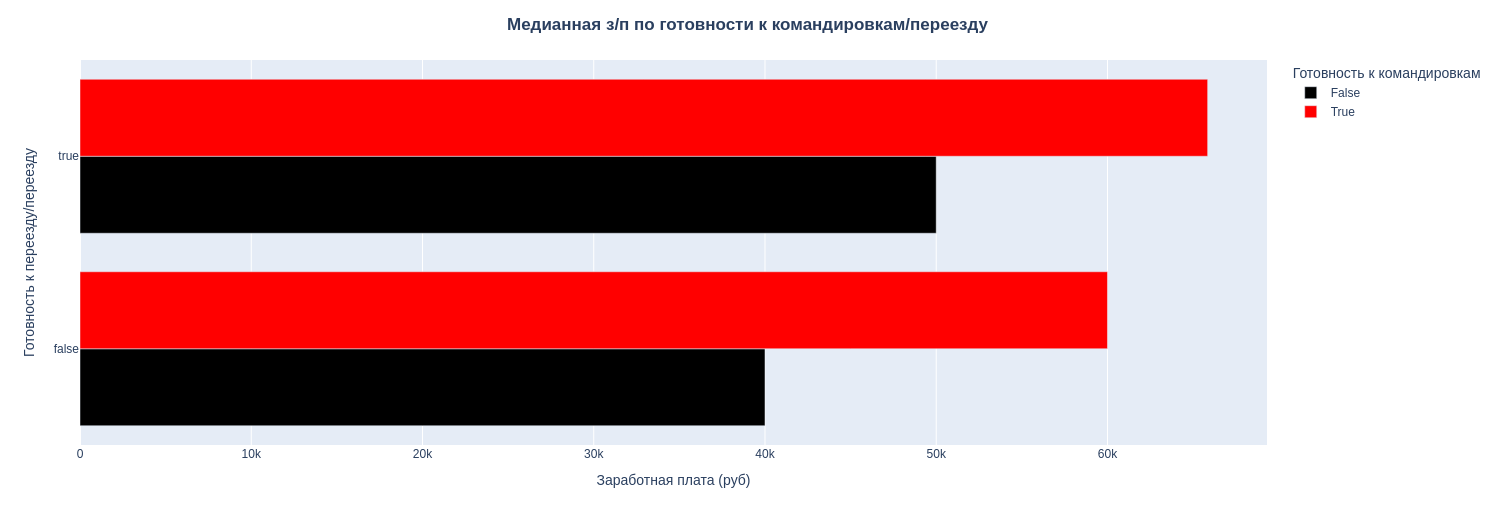

Вывод: при готовности к переездам и командировкам уровень желаемой заработной платы возрастает. Готовность к командировкам ценится больше, предположу что это связано с более высокими выплатами "командировочных" и рядовых сотрудников не отправляют в командировки, следовательно и должность соискателя выше, а значит и изначальный желаемый уровень заработной платы. При готовности к переезду уровень желаемой заработной платы возрастает, предположу что это связано с переездом в более крупные города с целью улучшения качества жизнени, а значит и с ростом желаемой заработной платы.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [96]:
#Построение сводной таблицы иллюстрирующую зависимость медианной желаемой заработной платы от Возраста и Образования
salary_age=pd.pivot_table(
    hh_data,
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)

fig = px.imshow(
    img=salary_age,
    labels={'color': 'Медианная желаемая ЗП (руб)'},
    aspect='equal',
    color_continuous_scale=["pink", "red", "black"]
)

fig.update_layout(title_text='<b>Зависимость медианной заработной платы от возраста и образования</b>', title_x=0.5)
fig.show()

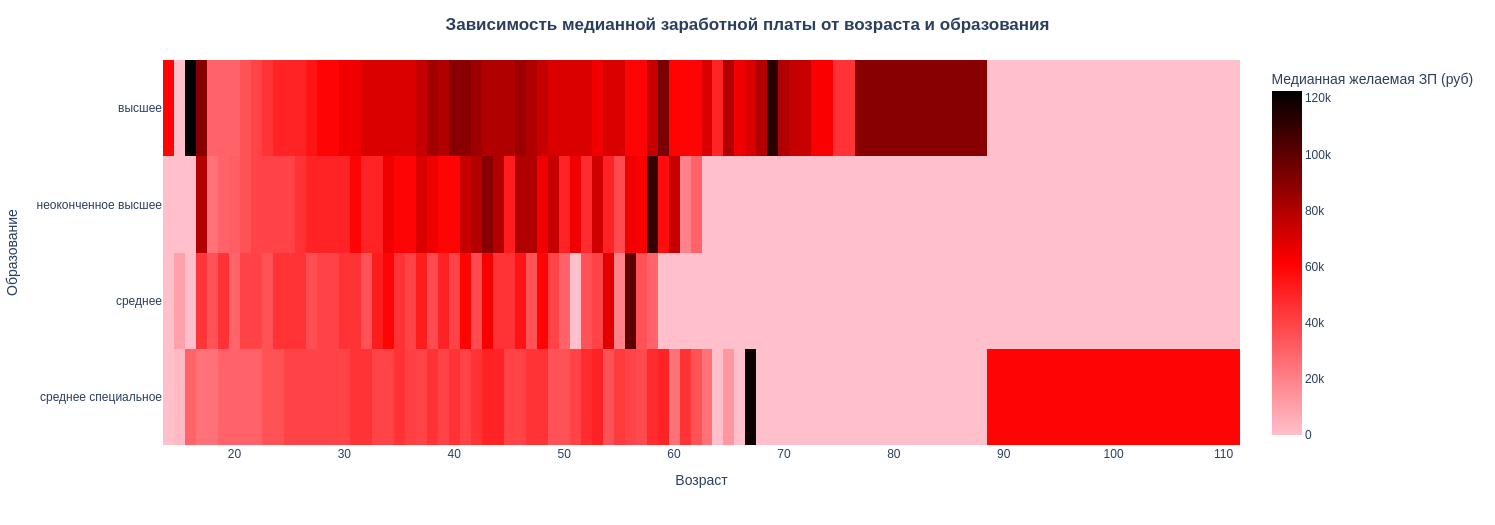

Вывод: самый быстрый рост желаемой заработной платы наблюдается в кратегории соискателей с высшим образованием. На тепловой карте отчетливо видны выбросы в соотношении возрастной категории и желаемой заработной плате. В категории с высшим образованием соискатель в возрасте 14 лет желает медианную заработную плату в размере 60 т.р., а в возрасте 16 лет - 122 т.р. В категории средне специального образования присутствует соискатель в возрасте 100 лет и соискатель с выбрасом в желаемой заработной плате 120 т.р. Видны пропуски в данных с не указанной желаемой заработной платой во всех категориях. Можно заметить плавный рост желаемой заработной платы до 40-45 лет(карьерный рост, получение опыта) и такой же плавный последующий спад, что выглядит вполне логично, в категориях Среднего и Средне специального данный рост менее выражен.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [99]:
experience_age=hh_data.copy()
experience_age['Опыт работы (год)']=experience_age['Опыт работы (месяц)']/12

x=[0,100]
y=[0,100]
fig = px.scatter(
    data_frame=experience_age,
    x='Возраст',
    y='Опыт работы (год)',
    color_discrete_sequence=["black"]
)

fig.update_layout(title_text='<b>Зависимость опыта работы от возраста</b>', title_x=0.5)
fig.add_trace(
    go.Scatter(x=[0, 100], y=[0, 100], name="Опыт равен возрасту соискателя"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=[0, 100, 0, 0], y=[0, 100, 100, 0], name="Зона аномалии данных", fill="toself", fillcolor="red", opacity=0.2),
    secondary_y=False,
)
fig.show()

#Ответ на контрольные вопросы
answer = experience_age[experience_age['Опыт работы (год)']>=experience_age['Возраст']]
print(f'Сколько точек лежат строго выше построенной прямой? Ответ: {answer.shape[0]}')

Сколько точек лежат строго выше построенной прямой? Ответ: 7


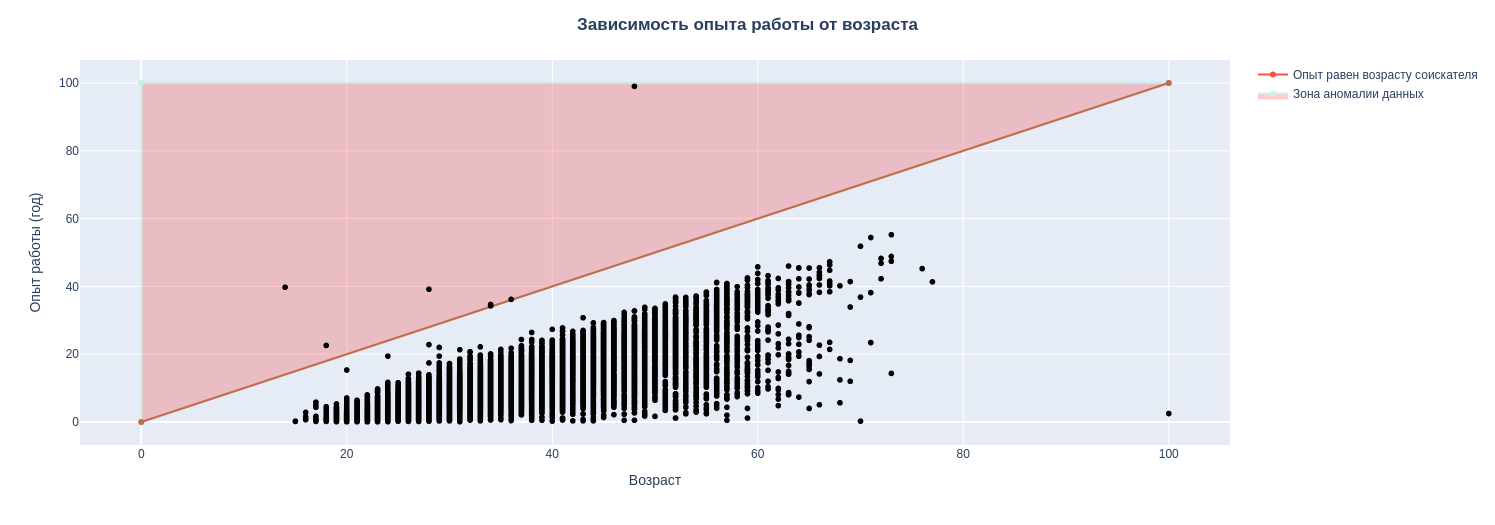

Вывод: на графике отчетливо заметна прямая зависимость возраста и опыта соискателя, чем больше возраст тем больше становится опыта у соискателя. Можно заметить что расстояние от проведенной линии до точек примерно сохраняется на одном уровне, данное расстояние - возраст когда получать опыт не представляется возможным, возраст от рождения соискателей до окончания ими учебных заведений(0-17). Выбросы распологающиеся выше линии говорят о том что опыт соискателя превышает его возраст. По данной зависимости видно что свыше 67 лет соискателей сильно меньше, считаю что свыше этого возраста все можно считать выбросами

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [100]:
#Соотношение количества резюме по гендерному признаку
hh_data_gender = hh_data.groupby('Пол').size()

fig = px.pie(
    data_frame=hh_data,
    values=hh_data_gender,
    names=['Женщины', 'Мужчины'],
    color_discrete_sequence=["red", "black"]
)
fig.update_layout(title_text='<b>Соотношение соискателей по гендерному признаку</b>', title_x=0.5)
fig.show()

In [102]:
#Распределение ЗП по должностям
#Построение сводной таблицы иллюстрирующую зависимость медианной желаемой заработной платы от Возраста и должности
post=hh_data.groupby('Ищет работу на должность:', as_index=False)['ЗП (руб)'].size().sort_values('size', ascending=False).iloc[0:15]
display(post)

fig = px.histogram(
    data_frame=post,
    x='size',
    y='Ищет работу на должность:',
    #color='Образование',
    title='Распределения желаемой заработной платы в зависимости от образования',
    color_discrete_sequence=["red", "grey", "gold", "black"],
)
fig.update_layout(title_text='<b>Зависимость медианной желаемой заработной платы от уровня образования соискателей</b>', title_x=0.5)
fig.show()

post=pd.pivot_table(
    hh_data,
    index='Пол',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)

fig = px.imshow(
    img=sex_age,
    labels={'color': 'Медианная желаемая ЗП (руб)'},
    aspect='equal',
    color_continuous_scale=["pink", "red", "black"]
)

fig.update_layout(title_text='<b>Зависимость медианной заработной платы от возраста и образования</b>', title_x=0.5)
fig.show()

Ищет работу на должность:  size
11502           Системный администратор  3099
5025                            Инженер   966
3111                           Аналитик   809
7363                  Менеджер проектов   745
10652              Руководитель проекта   718
13042  Специалист технической поддержки   695
10848             Руководитель проектов   669
13778            Технический специалист   498
8693                        Программист   475
7301                   Менеджер проекта   471
12542                  Специалист по IT   461
5919                Инженер-программист   445
6869         Менеджер интернет-магазина   436
6770                           Менеджер   374
8260                           Оператор   371

Выводы: У мужчин большие ожидания по ЗП.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [103]:
dupl_columns = list(hh_data.columns)
mask = hh_data.duplicated(subset=dupl_columns)
hh_duplicates = hh_data[mask]
print(f'Изначальное число записей: {hh_data.shape[0]}')
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')
hh_dedupped = hh_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Изначальное число записей: 44744
Число найденных дубликатов: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [104]:
cols_null = hh_dedupped.isnull().sum()
display(cols_null[cols_null>0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [106]:
hh_dedupped = hh_dedupped.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_dedupped = hh_dedupped.fillna(hh_dedupped['Опыт работы (месяц)'].median())

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [107]:
outliers = hh_dedupped[(hh_dedupped['ЗП (руб)'] > 1000000) | (hh_dedupped['ЗП (руб)']<1000)]
print(outliers.shape[0])
hh_dedupped = hh_dedupped.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

89
Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [108]:
outliers = hh_dedupped[(hh_dedupped['Опыт работы (месяц)']/12)>hh_dedupped['Возраст']]
print(f'Аномалии данных (опыт работы больше либо равен возрасту соискателя): {outliers.shape[0]}')
hh_dedupped = hh_dedupped.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Аномалии данных (опыт работы больше либо равен возрасту соискателя): 7
Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


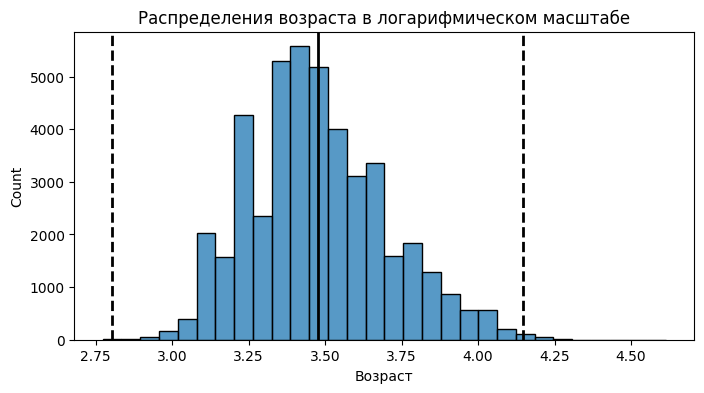

In [109]:
#Правило трёх сигм, параметры left и right задают число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения.
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (left * sigma)
    upper_bound = mu + (right * sigma)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

log_age = pd.DataFrame(hh_dedupped,columns=['Возраст'])
log_age['log_age'] = np.log(hh_dedupped['Возраст'])

fig = px.histogram(
    data_frame=log_age,
    x='log_age',
    #labels={'Balance':'Баланс', 'Exited': 'Статус', 'y':'Количество'},
    color_discrete_sequence=["red"],
    #nbins = 30
)

fig.add_vline(x=log_age['log_age'].mean(), line_width=5, line_color="black")
fig.add_vline(x=log_age['log_age'].mean()-(3*log_age['log_age'].std()), line_width=5, line_dash="dash", line_color="black")
fig.add_vline(x=log_age['log_age'].mean()+(3*log_age['log_age'].std()), line_width=5, line_dash="dash", line_color="black")

fig.update_layout(title_text='<b>Распределения возраста в логарифмическом масштабе</b>', title_x=0.5)
fig.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age_math = np.log(hh_dedupped['Возраст'] + 1)
histplot = sns.histplot(log_age_math, bins=30, ax=ax)
histplot.axvline(log_age_math.mean(), color='k', lw=2)
histplot.axvline(log_age_math.mean()+ 3 * log_age_math.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age_math.mean()- 3 * log_age_math.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределения возраста в логарифмическом масштабе');

outliers, cleaned = outliers_z_score_mod(hh_dedupped, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Под категорию выбросов попали всего 3 значения с возрастами 15 и 100 лет. Судя по всему, мы указали слишком щадящие параметры для метода z-отклоненийй.